In [ ]:
#Attaching packages
library(dplyr)
library(xml2)
library(rvest)
library(selectr)
library(ggplot2)
library(forecast)
require(graphics)
library(Metrics)
library(tseries)

x <- read.csv("../input/indian-steel-industry/Core_Industries-Production-December_2016.csv")
x <- data.frame(x)

In [2]:
# Data of production of steel in thousand tonnes in India
x1<-x$Production.of.Steel..in.Thousand.Tonnes.
x1<- x1[12:155]

# Creating timeseries
temp <- ts(x1[1:144], start=c(2005, 1), end=c(2016, 12), frequency=12)
class(temp)

[1] "ts"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3523    4668    5836    5918    7264    8616 

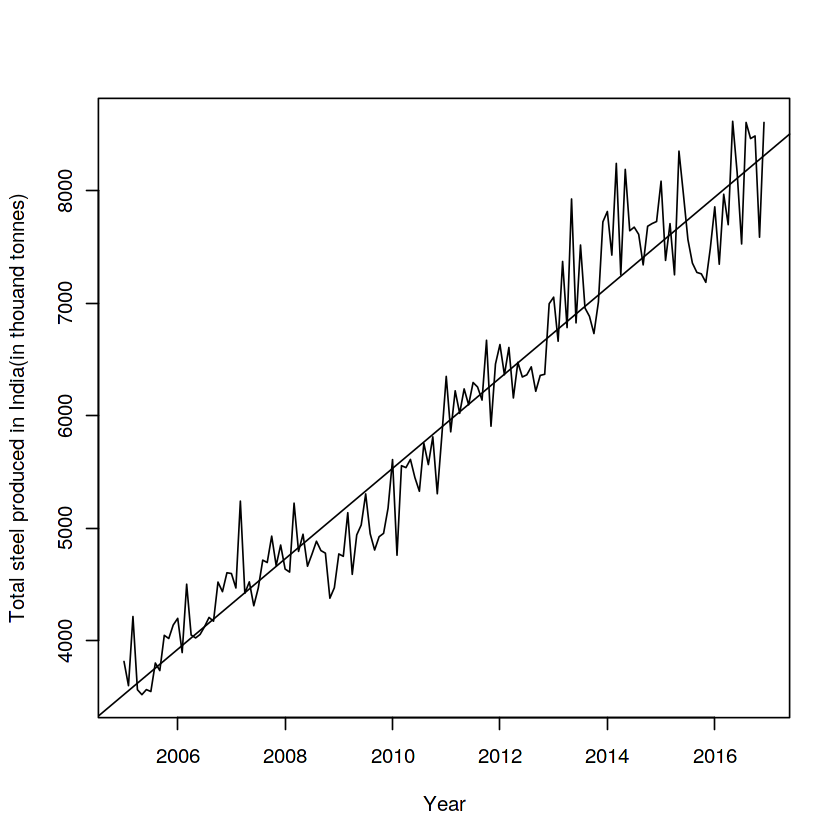

In [3]:
# Analysis
summary(temp)
plot(temp,xlab="Year", ylab="Total steel produced in India(in thouand tonnes)")

# Regression line
abline(reg=lm(temp~time(temp)))

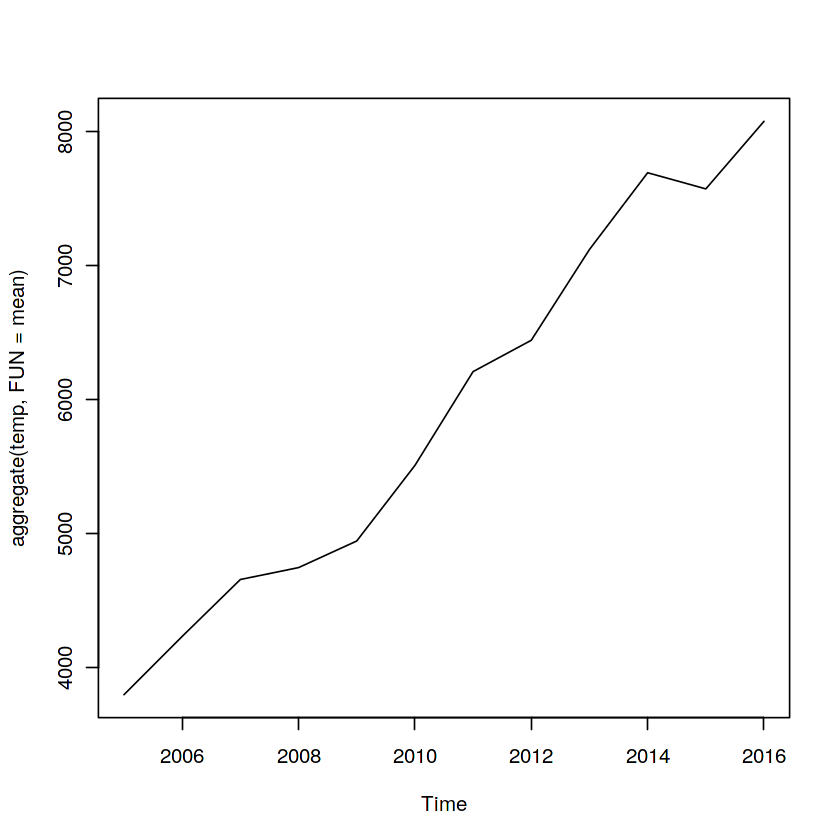

In [4]:
# Year on year trend for aggregate of data(mean)
plot(aggregate(temp,FUN=mean))

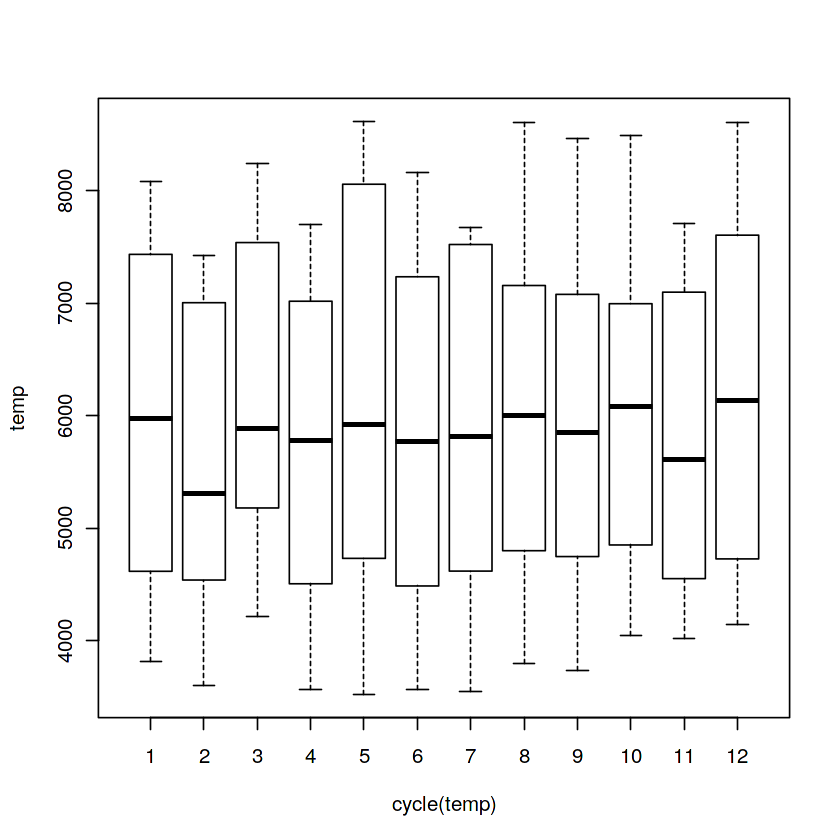

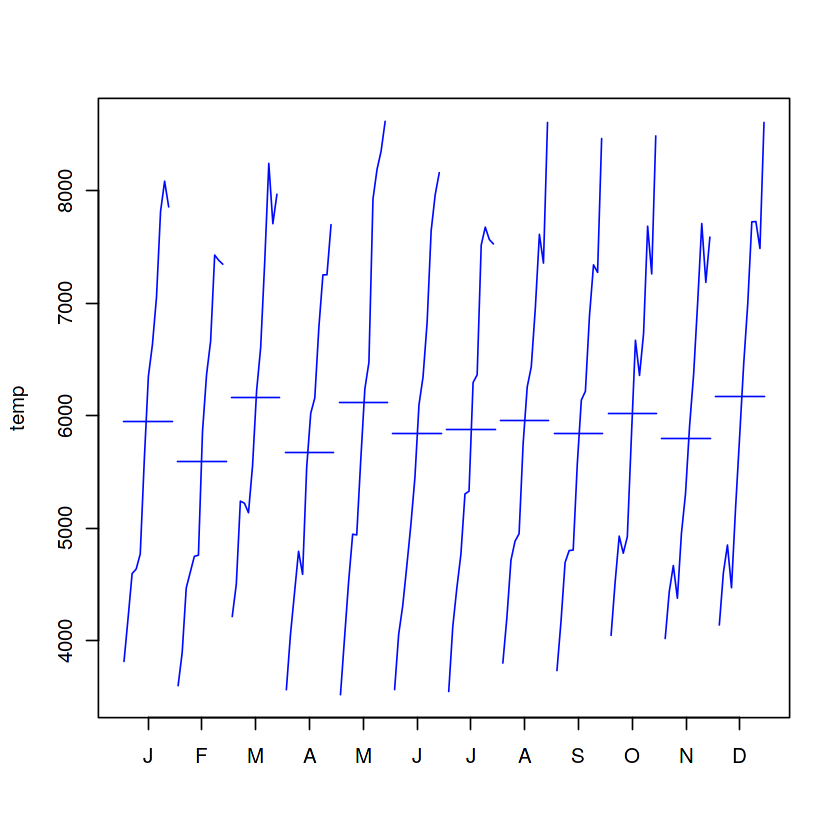

In [5]:
# Boxplot of monthly cycle across years
boxplot(temp~cycle(temp))
monthplot(temp, col="#0009ff")

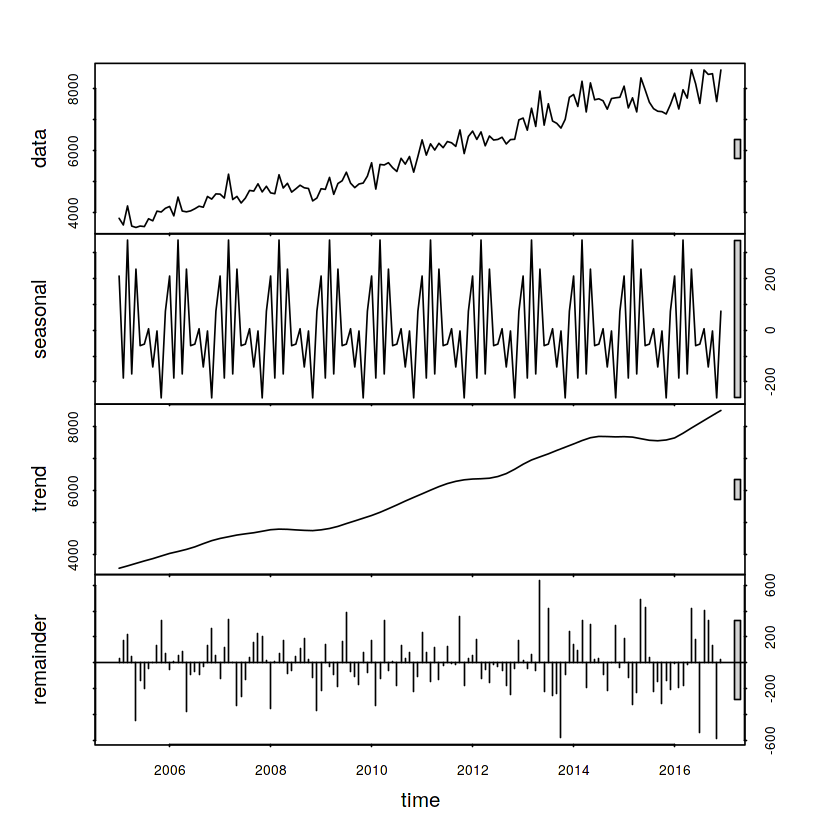

In [6]:
# STL decomposition
y <- stl(temp, s.window="period")
plot(y)

In [7]:
y_seasonal <- y$time.series[,1] # seasonal
y_trend <- y$time.series[,2] # trend
y_random <- y$time.series[,3] # random

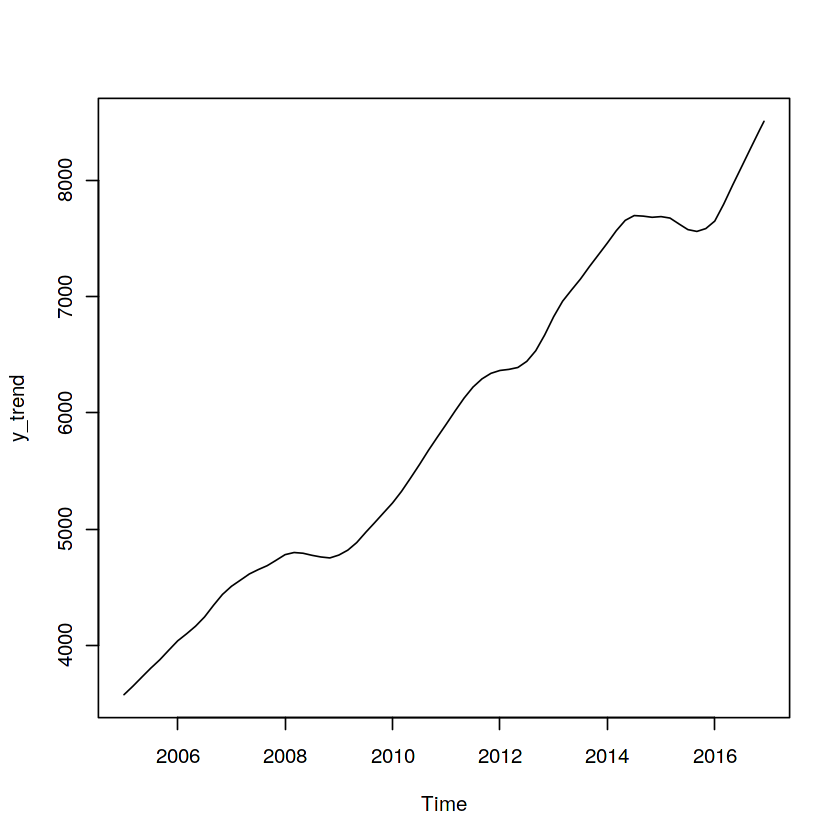

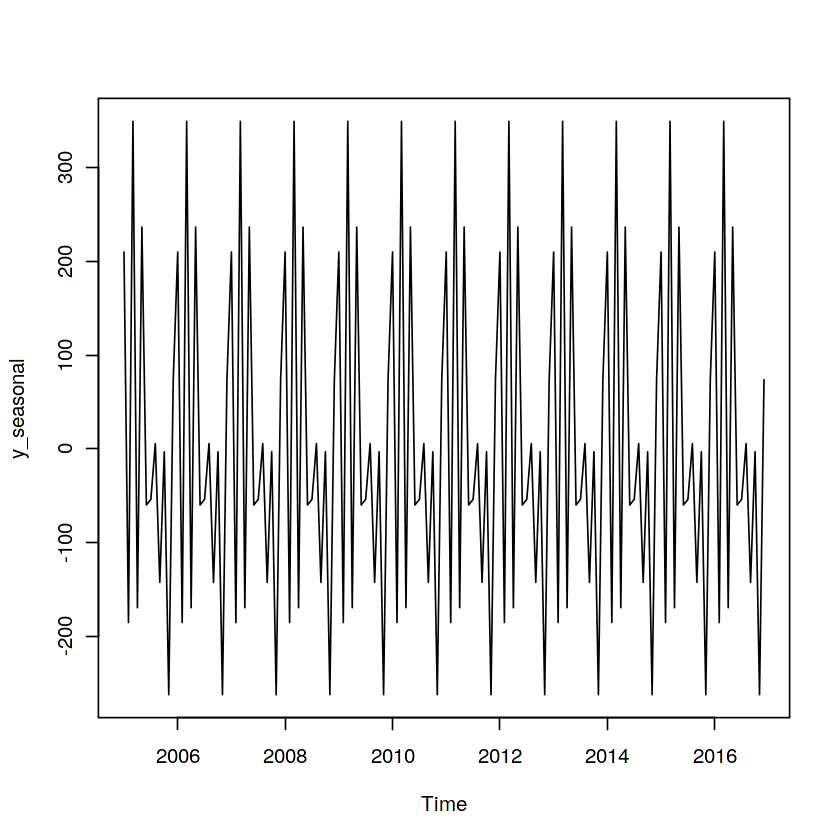

In [8]:
# Trend
plot(y_trend)

# Seasonality
plot(y_seasonal)

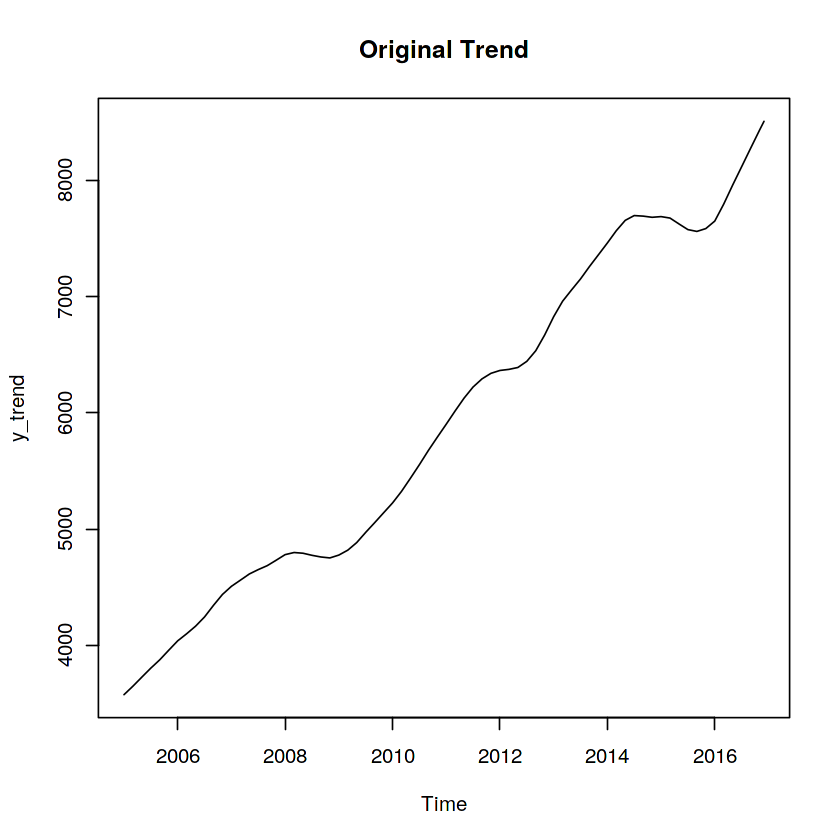

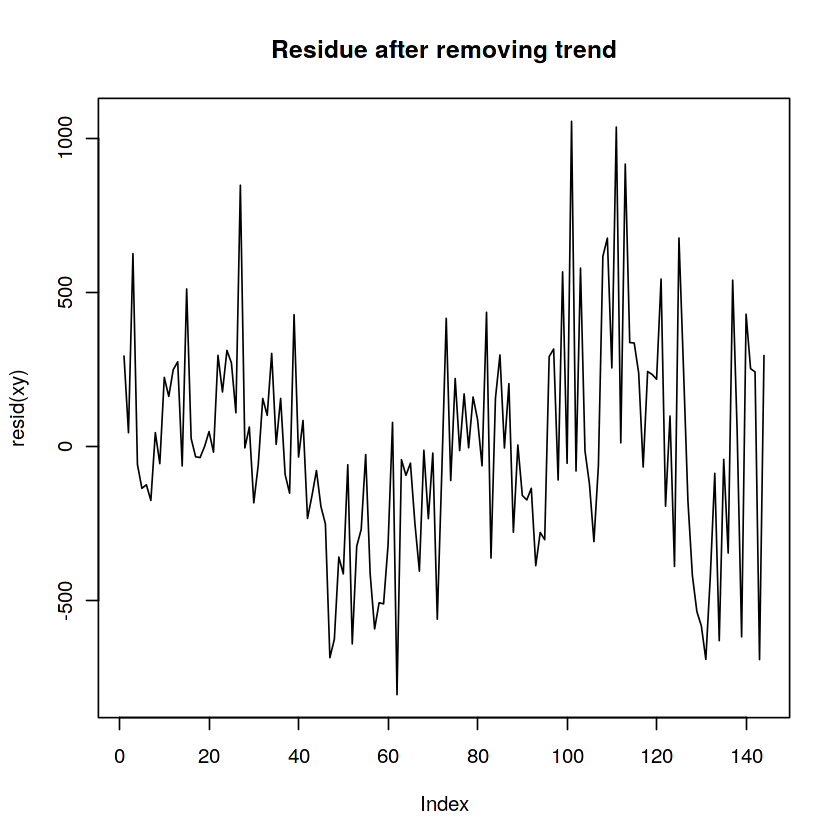

In [9]:
# Removing trend
xy <- lm(temp ~ c(1:length(temp)))
plot(y_trend, main = "Original Trend")
plot(resid(xy), type="l", main = "Residue after removing trend")

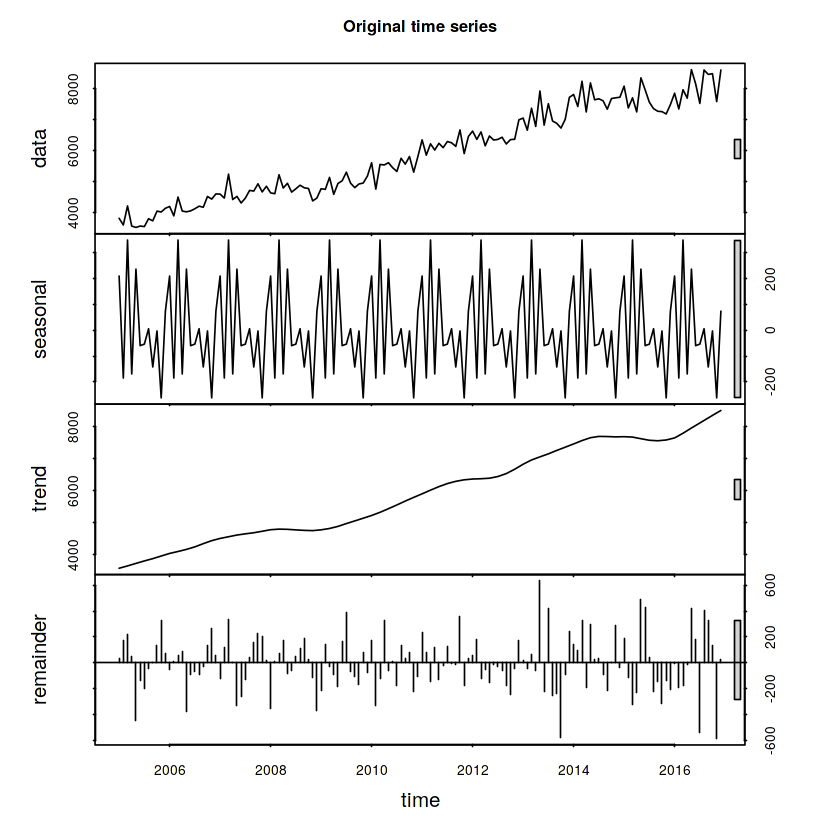

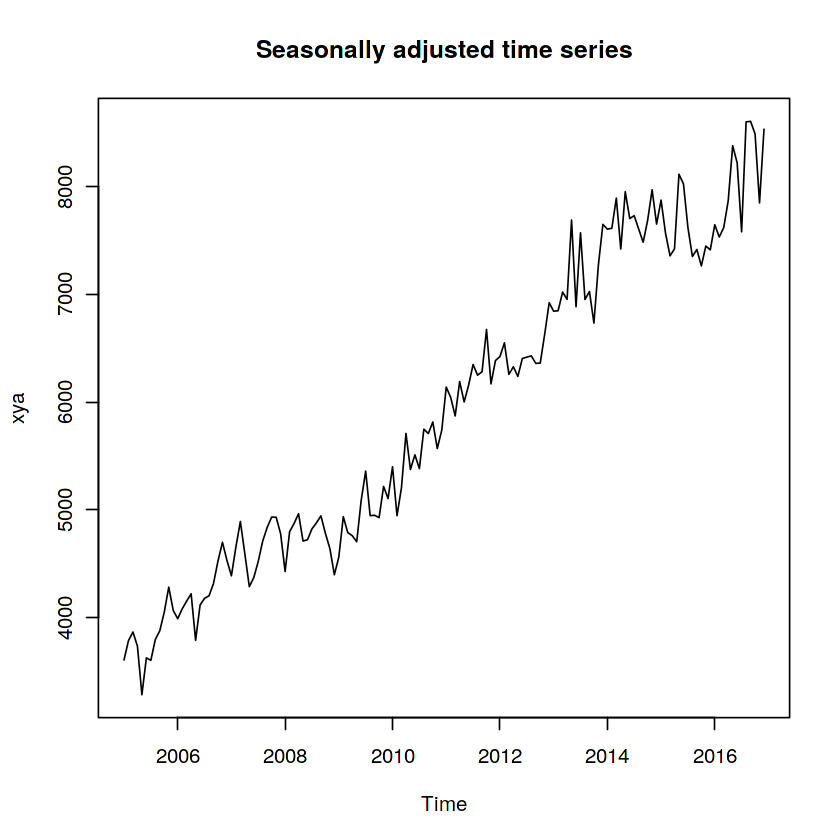

In [10]:
# Removing seasonality
# Seasonally adjusted time series (removed seasonality)
xya <- seasadj(y)
plot(y, main="Original time series")
plot(xya, main="Seasonally adjusted time series")

## Applying HoltWinters Model to the dataset to analyse the past data and predict future prediction

Holt-Winters exponential smoothing with trend and multiplicative seasonal component.

Call:
HoltWinters(x = temp1, seasonal = "mult")

Smoothing parameters:
 alpha: 0.3013509
 beta : 0
 gamma: 0.4925196

Coefficients:
            [,1]
a   7378.8920098
b     37.6181527
s1     1.0394313
s2     0.9709677
s3     1.0536884
s4     0.9810274
s5     1.0567171
s6     0.9706229
s7     1.0077882
s8     0.9764319
s9     0.9542990
s10    0.9704161
s11    0.9564484
s12    1.0307638


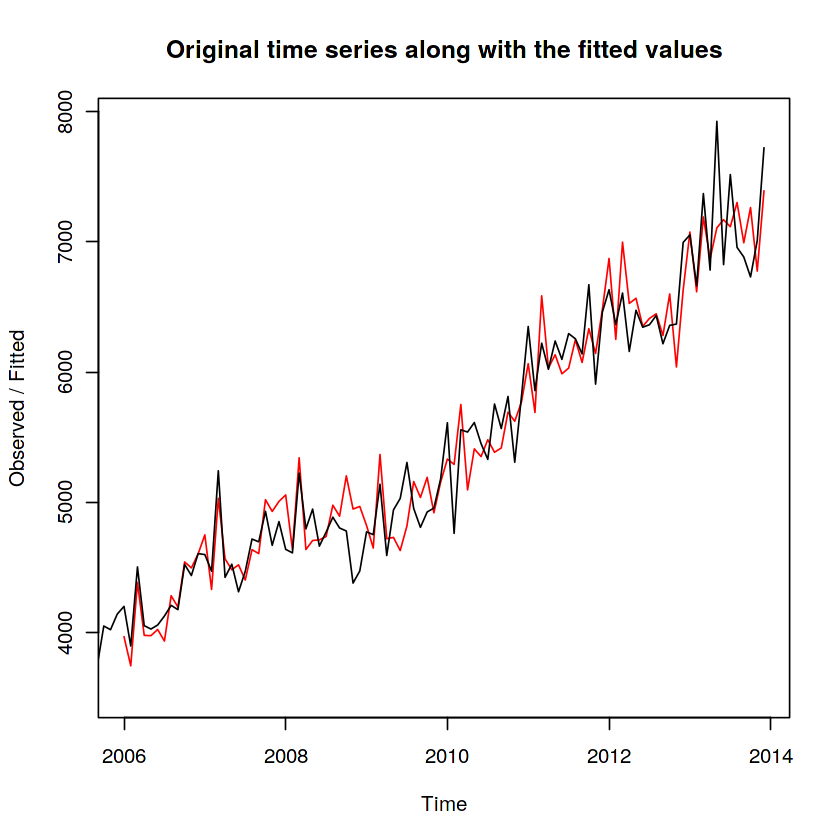

In [11]:
# HoltWinters Method 1-Seasonal
# Data preparation(75%=108/144 year 2005 to 2013)
temp1 <- ts(x1[1:108], start=c(2005, 1), end=c(2013, 12), frequency=12)
ax<-HoltWinters(temp1, seasonal="mult")
print(ax)

# Plotting against original time series
plot(ax, main="Original time series along with the fitted values")

Holt-Winters exponential smoothing with trend and without seasonal component.

Call:
HoltWinters(x = temp1, gamma = FALSE)

Smoothing parameters:
 alpha: 0.3824316
 beta : 0.204214
 gamma: FALSE

Coefficients:
        [,1]
a 7264.88304
b   39.19924


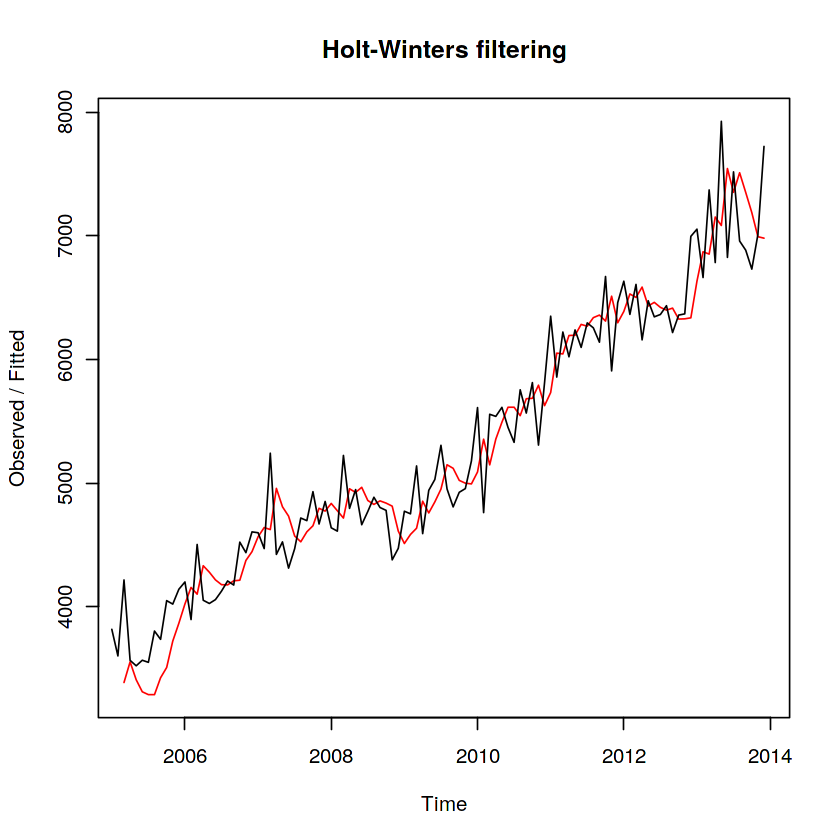

In [12]:
# Holt-Winters Method 2-Non Seasonal
ax1 <- HoltWinters(temp1, gamma = FALSE)
print(ax1)
plot(ax1)

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = temp1, beta = FALSE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.3781805
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 7248.494


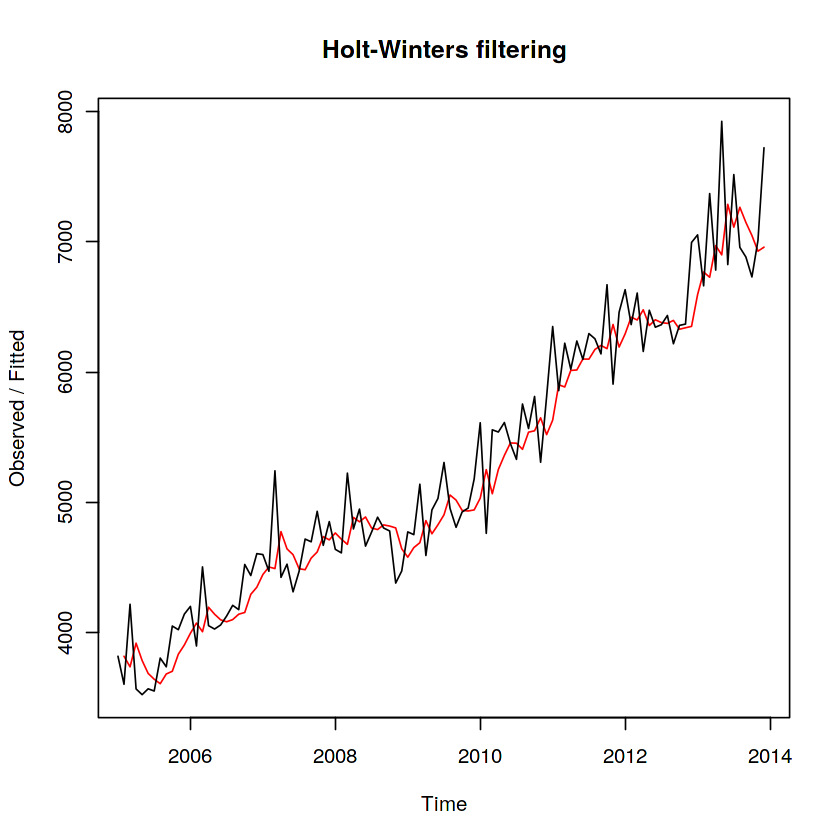

In [13]:
# Holt-Winters Method 3-Exponential Smoothing
ax2 <- HoltWinters(temp1, gamma = FALSE, beta = FALSE)
print(ax2)
plot(ax2)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2014,7709,7238,7894,7387,7996,7381,7702,7499,7365,7526,7453,8071
2015,8178,7676,8370,7829,8473,7819,8157,7940,7796,7964,7885,8537
2016,8647,8114,8845,8272,8950,8258,8612,8380,8226,8402,8317,9002


RMS Error:  496.635939211555


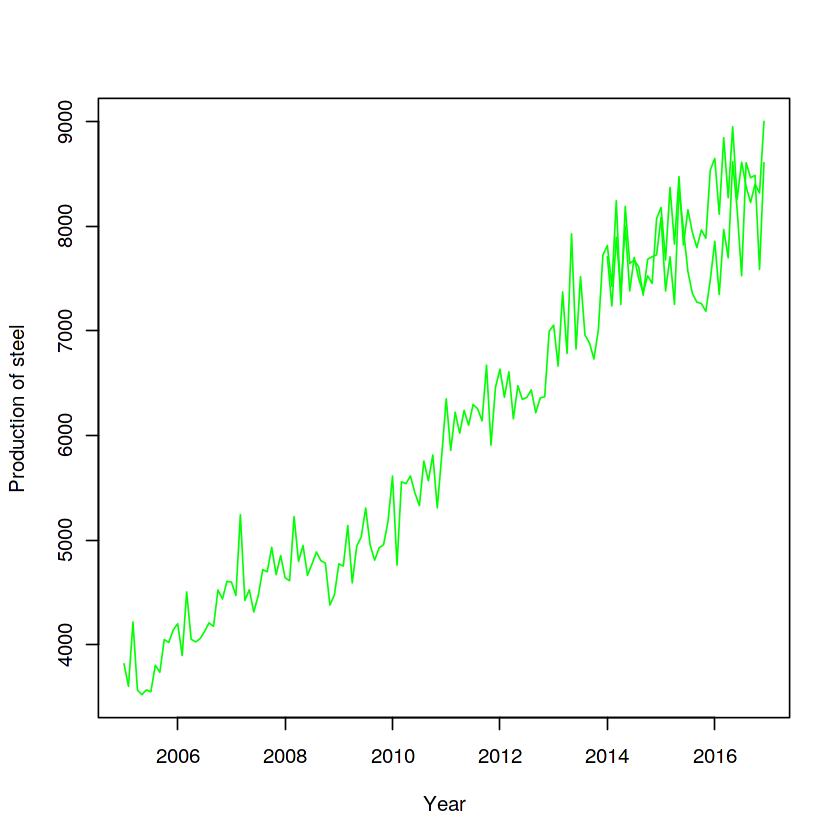

In [14]:
# Prediction Method 1-Seasonal
# Predicting for remaining 25%=3 years of data
prediction_1 = predict(ax,n.ahead = 3*12)
round(prediction_1)

# Original past 3 year's data
last=tail(temp,36)

# Below line gives the predicted and the above line gives the actual
ts.plot(temp,prediction_1, gpars=list(xlab="Year", ylab="Production of steel", col = "green"))

# RMS Error
rms1=rmse(last,prediction_1)
cat(sprintf("RMS Error:  %s\n", rms1))

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2014,7304,7343,7382,7422,7461,7500,7539,7578,7618,7657,7696,7735
2015,7774,7814,7853,7892,7931,7970,8010,8049,8088,8127,8166,8206
2016,8245,8284,8323,8362,8402,8441,8480,8519,8558,8598,8637,8676


RMS Error:  524.555206012903


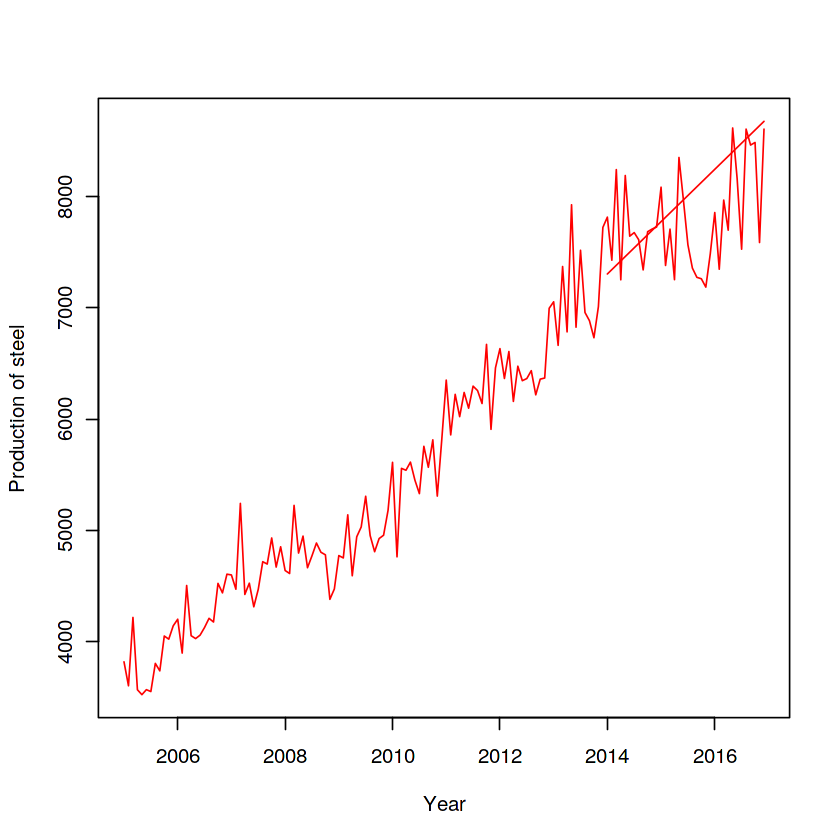

In [15]:
# Prediction Method 2-Non-Seasonal
# Predicting for remaining 25%=3 years of data
prediction_2 = predict(ax1,n.ahead = 3*12)
round(prediction_2)

# Linear line gives the predicted and the above line gives the actual
ts.plot(temp,prediction_2, gpars=list(xlab="Year", ylab="Production of steel", col = "red"))

# RMS Error
rms2=rmse(last,prediction_2)
cat(sprintf("RMS Error:  %s\n", rms2))

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2014,7248,7248,7248,7248,7248,7248,7248,7248,7248,7248,7248,7248
2015,7248,7248,7248,7248,7248,7248,7248,7248,7248,7248,7248,7248
2016,7248,7248,7248,7248,7248,7248,7248,7248,7248,7248,7248,7248


RMS Error:  684.095581149953


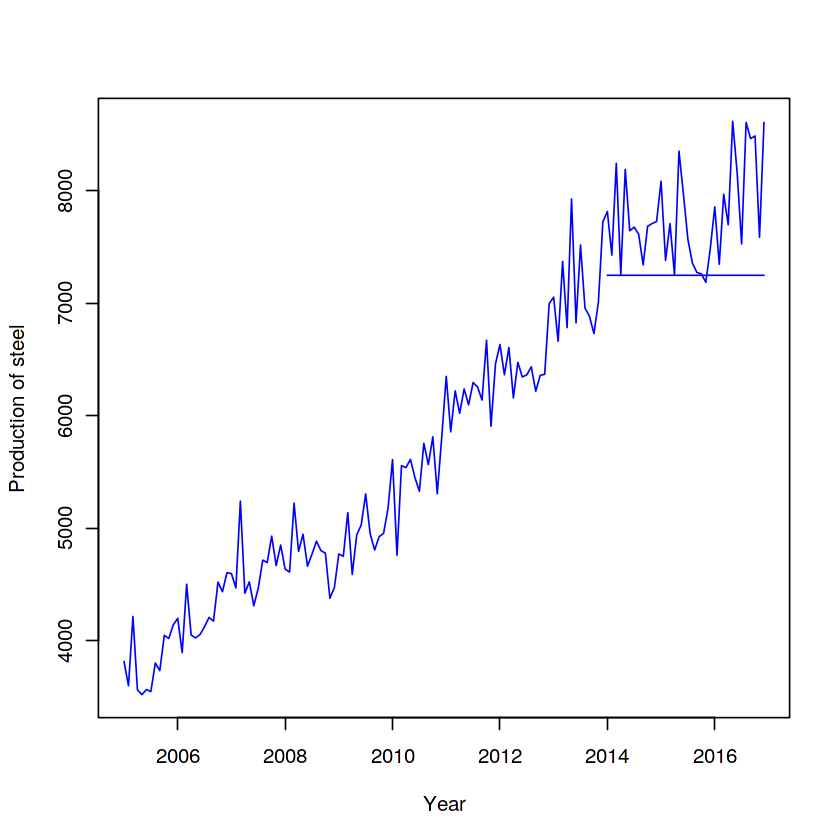

In [16]:
# Prediction Method 3-Exponential Smoothing
# Predicting for remaining 25%=3 years of data
prediction_3 = predict(ax2,n.ahead = 3*12)
round(prediction_3)

# Straight line gives the predicted and the above line gives the actual
ts.plot(temp,prediction_3, gpars=list(xlab="Year", ylab="Production of steel", col = "blue"))

# RMS Error
rms3=rmse(last, prediction_3)
cat(sprintf("RMS Error:  %s\n", rms3))

### As we can see rms1 < rms2 < rms3. Hence model 1-Seasonal is best

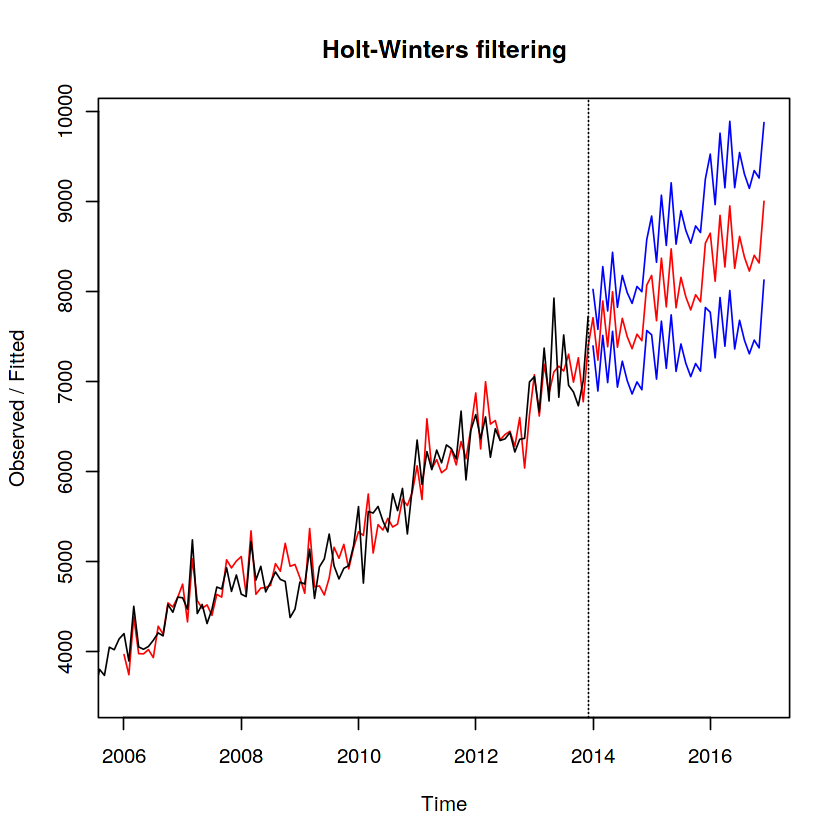

In [17]:
# 95% confidence interval-for seasonal model
# predict function
prediction_x = predict(ax,n.ahead = 3*12, prediction.interval = T, level=0.95)
plot(ax,prediction_x)

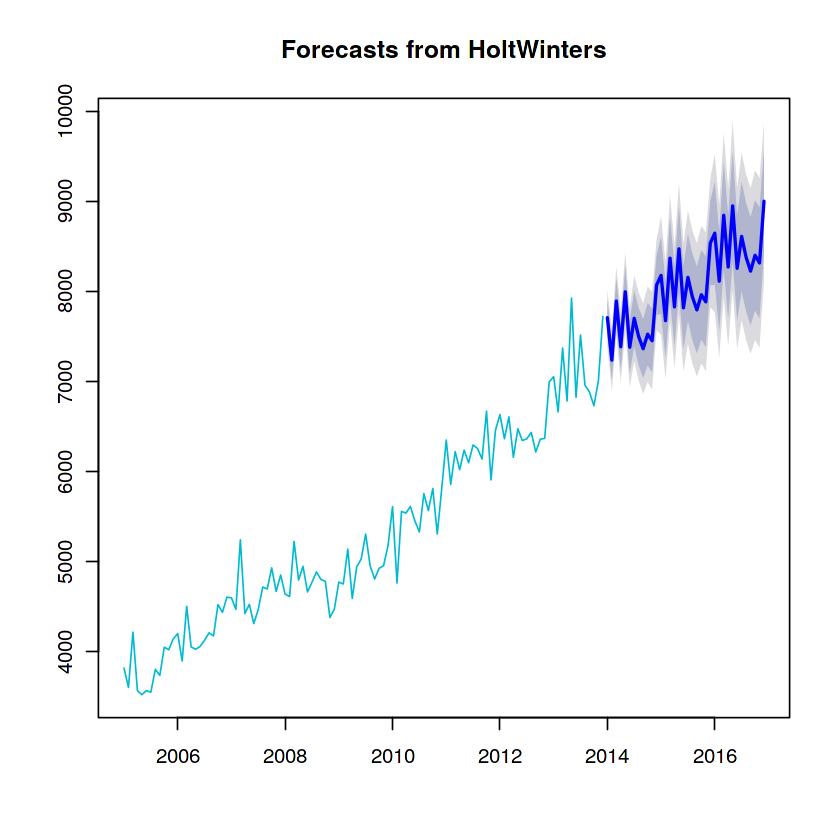

In [18]:
# 95% confidence interval-for seasonal model
# forecast function
prediction_y=forecast(ax,h=12*3)
plot(prediction_y, col="#00bad2")

Warning message:
“`tbl_df()` is deprecated as of dplyr 1.0.0.
Please use `tibble::as_tibble()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”
Warning message:
“Removed 36 row(s) containing missing values (geom_path).”
Warning message:
“Removed 36 row(s) containing missing values (geom_path).”


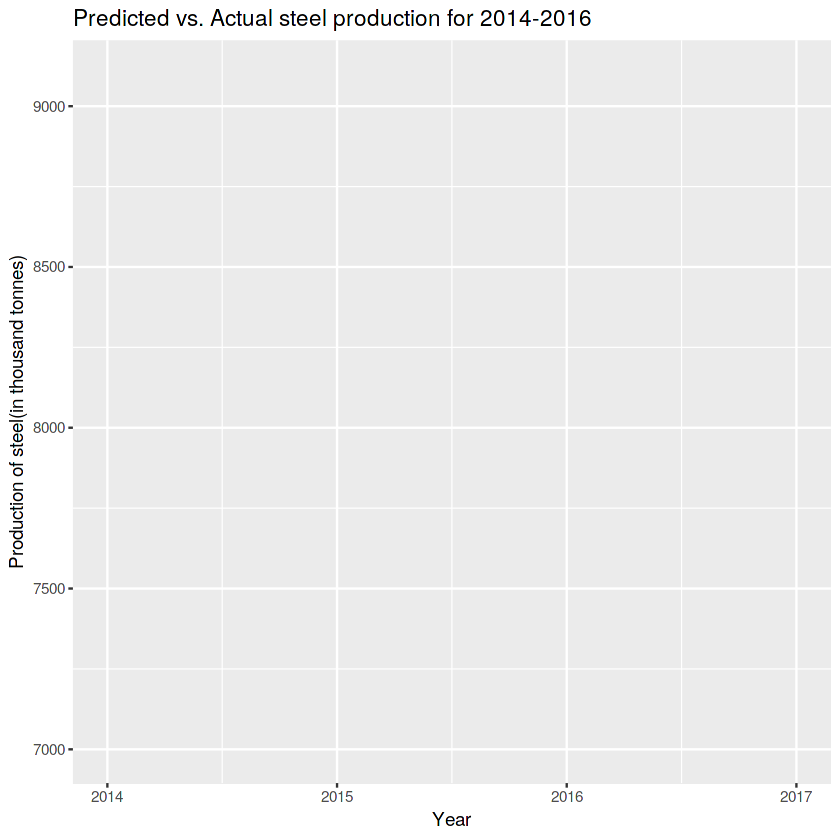

In [19]:
# predicted data for last 3 years
#data1=round(prediction_1)
data1=round(prediction_1[1:36])
#data1

# actual data for last 3 years
data2=last[1:36]
#data2

# Years
data3=round(prediction_1)
#data3=time(data3)

# Create a tibble
df=tbl_df(data.frame(data.frame(data1),data.frame(data2),data3))

# Plot of last 3 years predicted and actual values
# Blue one shows predicted values and orange one indicates actual values
ggplot(df,aes(data3))+geom_line(aes(y=data1),color = "#00AFBB")+
geom_line(aes(y=data2),colour='orange')+
labs(y = "Production of steel(in thousand tonnes)", x = "Year")+
ylim(7000,9100)+xlim(2014,2017)+
ggtitle("Predicted vs. Actual steel production for 2014-2016")

## Applying ARIMA Model to the dataset to analyse the past data and predict future prediction

In [20]:
fit = auto.arima(temp1)
fit

Series: temp1 
ARIMA(3,1,2)(1,0,0)[12] 

Coefficients:
          ar1      ar2      ar3      ma1     ma2    sar1
      -0.2421  -0.5833  -0.6078  -0.3281  0.5980  0.7166
s.e.   0.1197   0.0975   0.0819   0.1547  0.1361  0.0728

sigma^2 estimated as 52049:  log likelihood=-734.21
AIC=1482.43   AICc=1483.56   BIC=1501.14

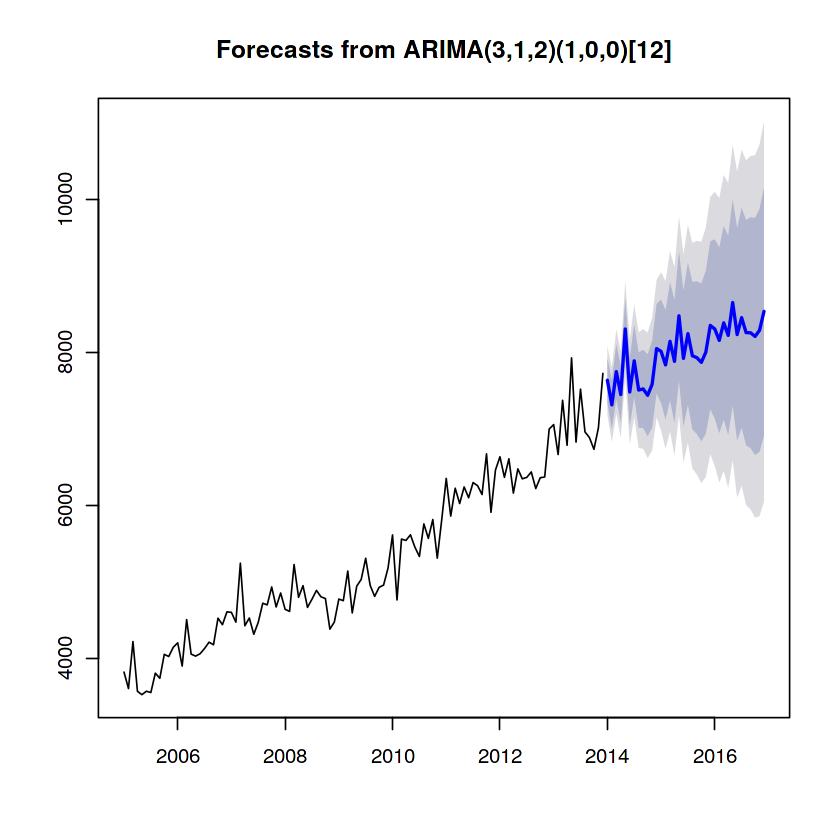

In [21]:
# Forecast for next 3 years
aws=forecast(fit,h=36)
plot(aws)

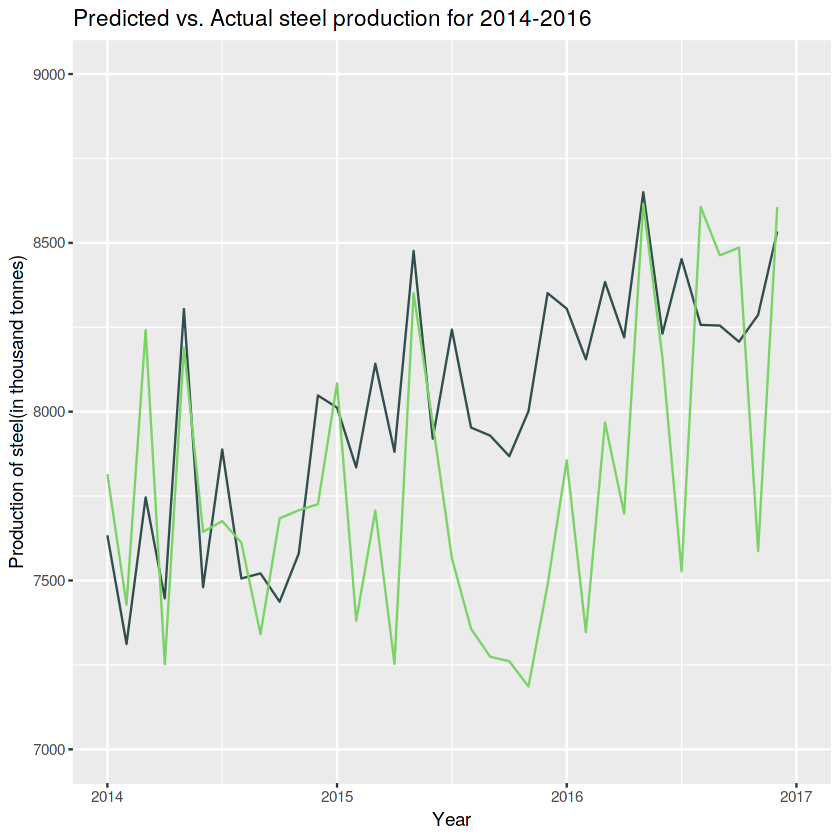

In [22]:
# Predicted vs. Actual for last 3 years-2014-2016
# Predicted values
datax=aws$mean[1:36]
datax=round(datax)
#datax

# Actual values
datay=last[1:36]
#datay

# Years
dataz=time(aws$mean)
#dataz

# Create a tibble
df=tbl_df(data.frame(data.frame(datax),data.frame(datay),dataz))

# Plot of last 3 years predicted and actual values
# Blue one shows predicted values and red one indicates actual values
ggplot(df,aes(dataz))+geom_line(aes(y=datax),color = "#314e4e")+
  geom_line(aes(y=datay),colour="#7ad365")+
  labs(y = "Production of steel(in thousand tonnes)", x = "Year")+
  ylim(7000,9000)+xlim(2014,2017)+
  ggtitle("Predicted vs. Actual steel production for 2014-2016")

In [23]:
# RMS error between predicted and actual values
rms4=rmse(last,aws$mean)
cat(sprintf("RMS Error:  %s\n", rms4))

RMS Error:  452.587992303142


### Now instead of Auto Arima, I'll use Manual ARIMA

In [24]:
# Manual ARIMA
# A series is said to be stationary when its mean, variance, and autocovariance are time invariant.
adf.test(temp,alternative="stationary")

# Non-stationary - Do differencing and take log
temp2=diff(log(temp))
adf.test(temp2,alternative="stationary")


	Augmented Dickey-Fuller Test

data:  temp
Dickey-Fuller = -3.23, Lag order = 5, p-value = 0.08572
alternative hypothesis: stationary


Warning message in adf.test(temp2, alternative = "stationary"):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  temp2
Dickey-Fuller = -6.5962, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


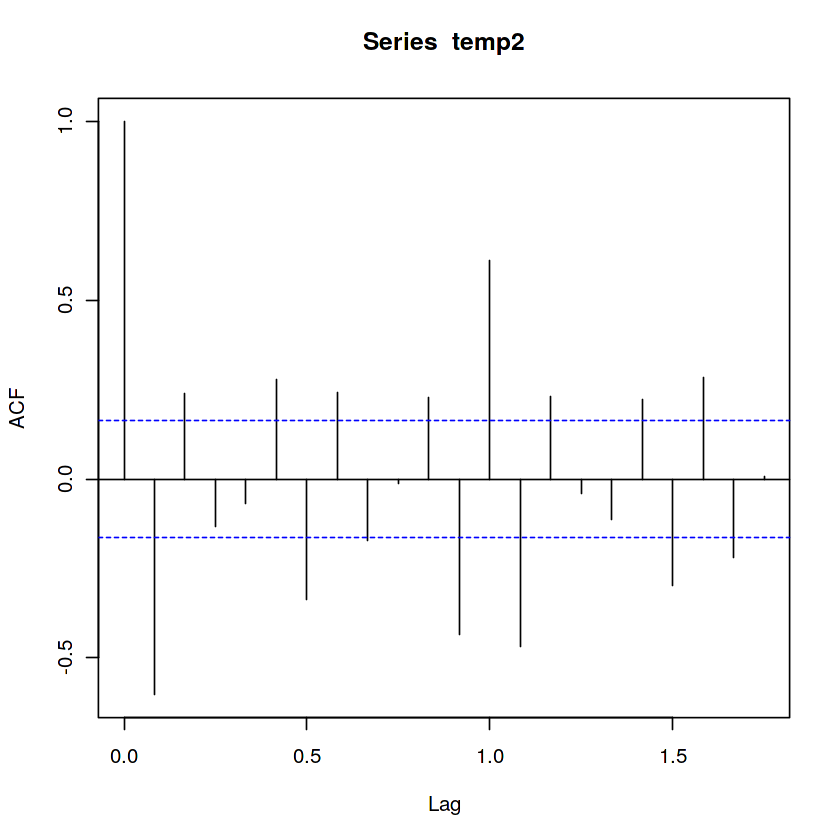

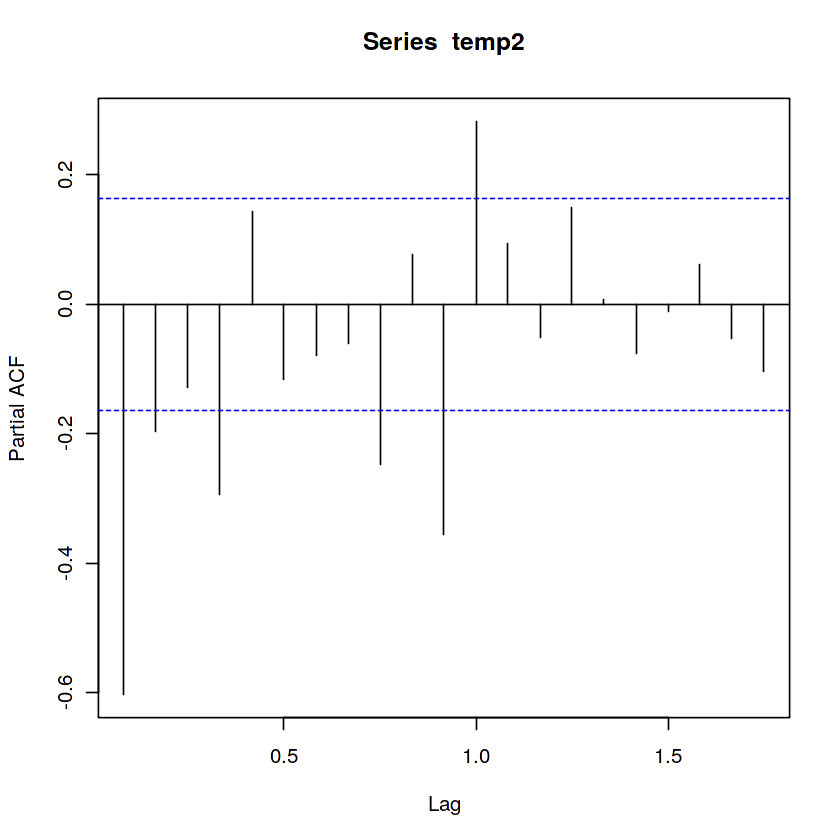

In [25]:
acf(temp2)
# cuts off after 2 lags
pacf(temp2)
# cuts off after 3-4 lags

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2014,7775,7319,7961,7421,8168,7521,7925,7683,7532,7612,7581,8297
2015,8450,7955,8653,8066,8878,8174,8614,8351,8186,8273,8240,9018
2016,9184,8646,9405,8766,9649,8884,9362,9076,8898,8992,8955,9801


RMS Error:  848.291469170041


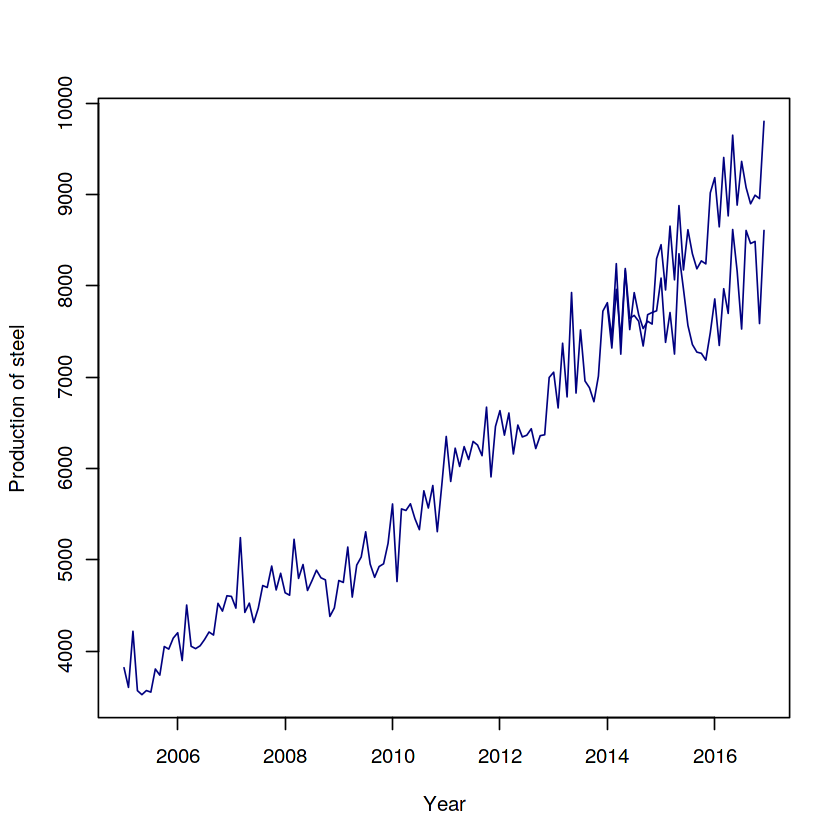

In [26]:
# From the above we can take q=1 and p = 0 or 1 or 2 or 3
# d=1 as one differencing applied

# Taking log to fit coz we took log before while differencing
# Trial and error for ARIMA
#-----------------------------------------------------------------------------------------------------------------------
# p=0
fit = arima(log(temp1), c(0,1,1), seasonal=list(order=c(0,1,1), period=12))
prediction_z=predict(fit, n.ahead=3*12)
prediction_5=exp(1)^(prediction_z$pred)
prediction_5=round(prediction_5,0)
prediction_5
# Next plot above line shows predicted and below line is actual
ts.plot(temp,prediction_5, gpars=list(xlab="Year", ylab="Production of steel", col = "navyblue"))
rms5=rmse(prediction_5,last)
cat(sprintf("RMS Error:  %s\n", rms5))

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2014,7804,7315,8009,7434,8176,7520,7940,7699,7557,7638,7600,8285
2015,8467,7950,8698,8085,8815,8185,8590,8386,8222,8350,8253,8983
2016,9197,8637,9449,8785,9566,8894,9326,9113,8933,9079,8965,9756


RMS Error:  851.608592279601


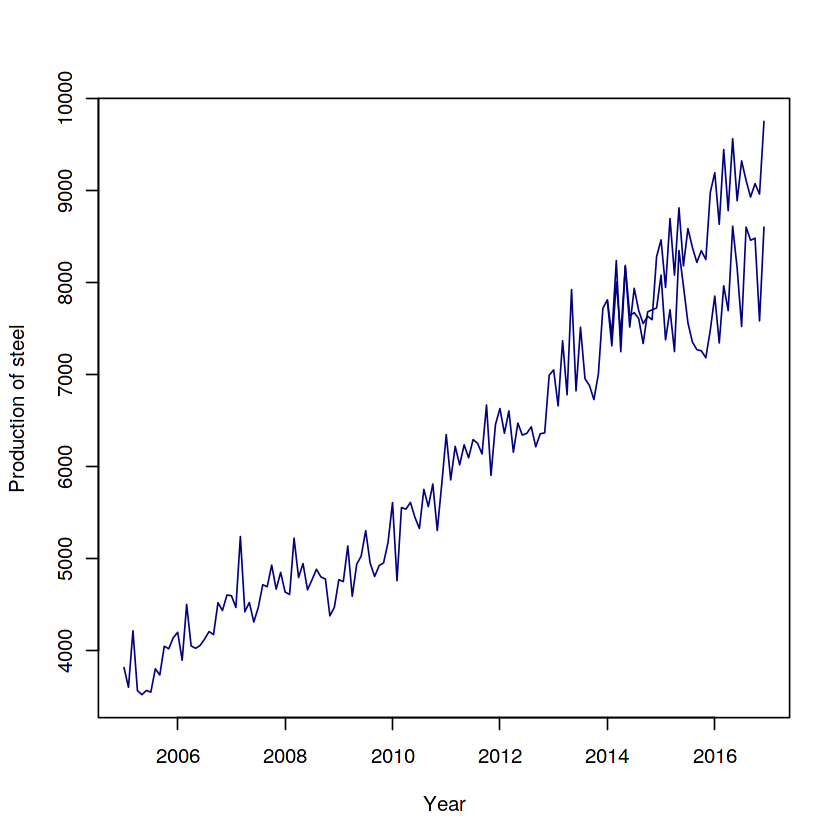

In [27]:
# p=1
fit = arima(log(temp1), c(1,1,1), seasonal=list(order=c(1,1,1), period=12))
prediction_z=predict(fit, n.ahead=3*12)
prediction_6=exp(1)^(prediction_z$pred)
prediction_6=round(prediction_6,0)
prediction_6
ts.plot(temp,prediction_6, gpars=list(xlab="Year", ylab="Production of steel", col = "navyblue"))
rms6=rmse(prediction_6,last)
cat(sprintf("RMS Error:  %s\n", rms6))

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2014,7924,7393,7975,7492,8187,7581,7976,7745,7596,7768,7588,8328
2015,8548,8053,8632,8072,8811,8201,8573,8360,8177,8312,8244,9054
2016,9249,8708,9420,8778,9756,8891,9430,9066,8897,8959,8983,9872


RMS Error:  872.029162993481


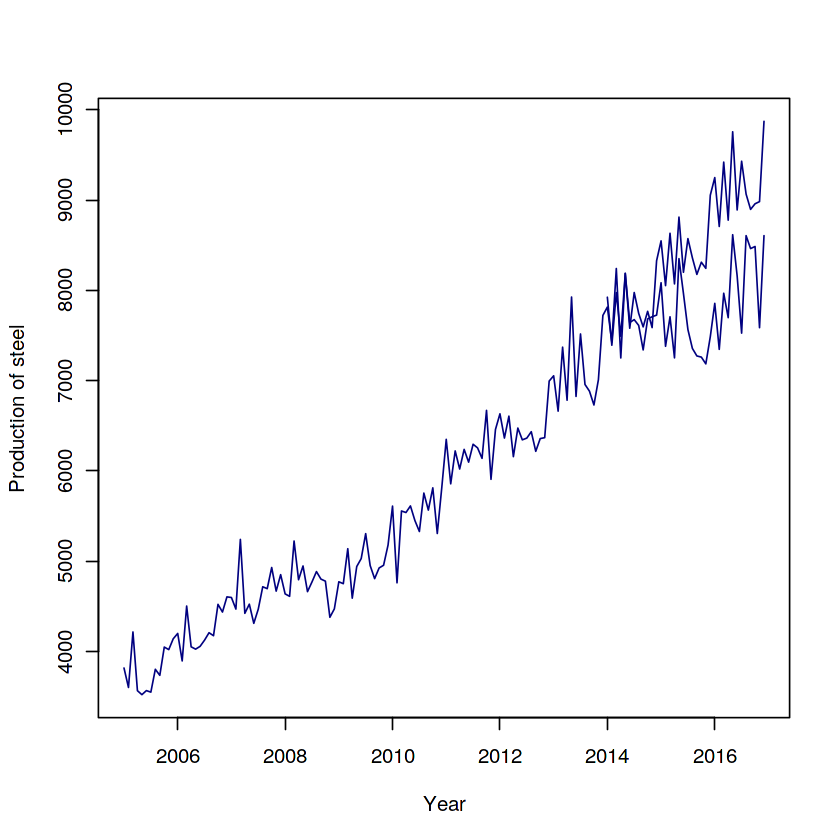

In [28]:
# p=2
fit = arima(log(temp1), c(2,1,1), seasonal=list(order=c(2,1,1), period=12),method="CSS")
# fit = arima(log(temp1), c(2,1,1), seasonal=list(order=c(2,1,1), period=12))
prediction_z=predict(fit, n.ahead=3*12)
prediction_7=exp(1)^(prediction_z$pred)
prediction_7=round(prediction_7,0)
prediction_7
ts.plot(temp,prediction_7, gpars=list(xlab="Year", ylab="Production of steel", col = "navyblue"))
rms7=rmse(prediction_7,last)
cat(sprintf("RMS Error:  %s\n", rms7))

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2014,7904,7105,7924,7495,8413,7579,7960,7727,7609,7600,7641,8350
2015,8710,7896,8745,8314,9146,8388,8806,8587,8449,8618,8370,9149
2016,9532,8745,9516,9024,9757,9159,9460,9355,9156,9382,9130,9987


RMS Error:  1001.20630019769


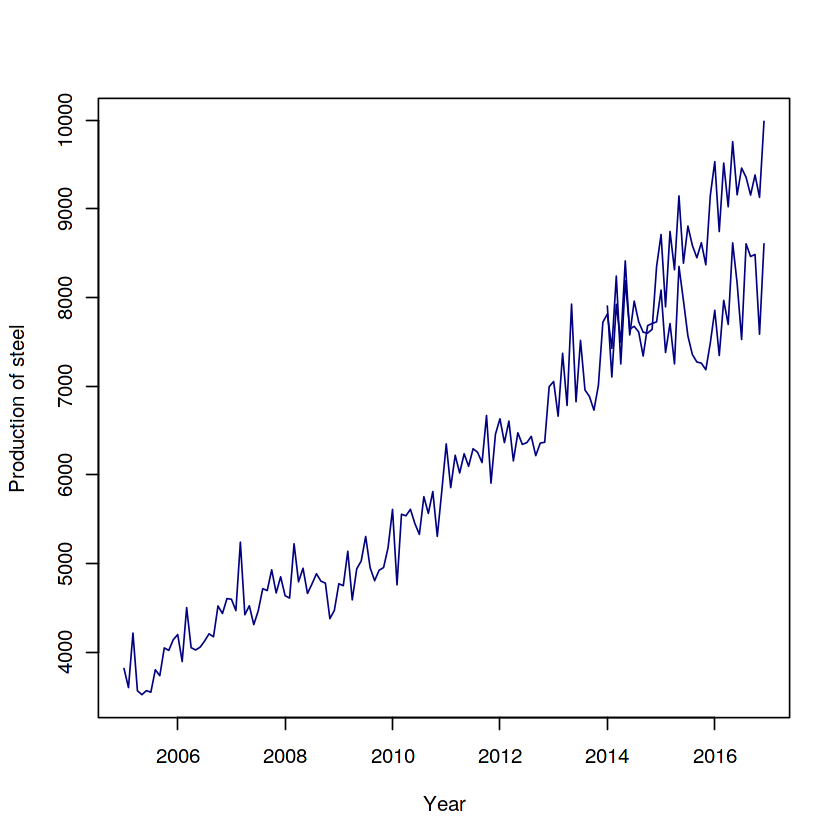

In [29]:
# p=3
fit = arima(log(temp1), c(3,1,1), seasonal=list(order=c(3,1,1), period=12))
prediction_z=predict(fit, n.ahead=3*12)
#prediction_z
prediction_8=exp(1)^(prediction_z$pred)
prediction_8=round(prediction_8,0)
prediction_8
ts.plot(temp,prediction_8, gpars=list(xlab="Year", ylab="Production of steel", col = "navyblue"))
rms8=rmse(prediction_8,last)
cat(sprintf("RMS Error:  %s\n", rms8))

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2014,7636,7279,7760,7326,7942,7380,7712,7477,7357,7378,7390,7935
2015,7958,7624,8061,7657,8216,7697,7996,7776,7660,7675,7681,8173
2016,8189,7880,8272,7901,8402,7927,8193,7990,7880,7889,7890,8329


RMS Error:  366.970253108705


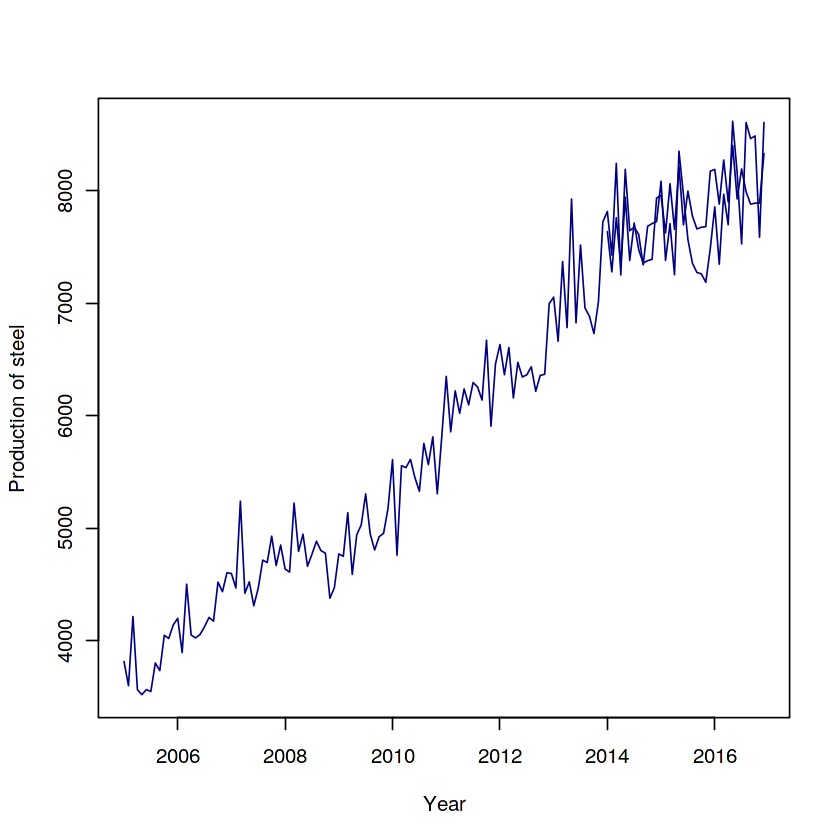

In [30]:
# d=0
fit = arima(log(temp1), c(1,0,1), seasonal=list(order=c(1,0,1), period=12))
prediction_z=predict(fit, n.ahead=3*12)
#prediction_z
prediction_9=exp(1)^(prediction_z$pred)
prediction_9=round(prediction_9,0)
prediction_9
ts.plot(temp,prediction_9, gpars=list(xlab="Year", ylab="Production of steel", col = "navyblue"))
rms9=rmse(prediction_9,last)
cat(sprintf("RMS Error:  %s\n", rms9))

### If we compare the best models for each method, we get:

* Seasonal HoltWinters Model gives rms value = rms1 = 496.6359
* Auto ARIMA Model gives rms value = rms4 = 452.5878
* Manual ARIMA Model gives rms value = rms9 = 366.9702

> ### The lowest value is given by rms9 and from this, we conclude that Manual ARIMA with p=1, d=0 and q=1 gives the best model for this dataset.